In [1]:
!pip install pandas seaborn

In [2]:
import pandas as pd
import seaborn as sns
import os
import glob
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Performance Analysis - Distributed Computing Benchmarks

This notebook analyzes performance metrics from distributed computing benchmarks across three scaling scenarios:
- **Strong Scaling (SS)**: Fixed problem size with increasing resources
- **Weak Scaling (WS)**: Problem size scales proportionally with resources
- **Worker Sweep (W-)**: Analysis across different worker configurations

## 1. Load and Categorize Data

In [24]:
# Initialize log directory
LOG_DIR = "/home/intel/ritik/iisc/deas-project/logs/project-test-7"

print(f"Log Directory: {LOG_DIR}")
print(f"Directory exists: {os.path.exists(LOG_DIR)}")

Log Directory: /home/intel/ritik/iisc/deas-project/logs/project-test-7
Directory exists: True


In [25]:
# Read all CSV files from the log directory
csv_files = glob.glob(os.path.join(LOG_DIR, "*.csv"))
print(f"Found {len(csv_files)} CSV file(s):\n")

# Categorize files by type
strong_scaling_files = []
weak_scaling_files = []
worker_sweep_files = []

for csv_file in csv_files:
    filename = os.path.basename(csv_file)
    print(f"  - {filename}")
    
    if filename.startswith('SS'):
        strong_scaling_files.append(csv_file)
    elif filename.startswith('WS'):
        weak_scaling_files.append(csv_file)
    elif filename.startswith('W-'):
        worker_sweep_files.append(csv_file)

print(f"\n\nCategorization:")
print(f"  Strong Scaling (SS): {len(strong_scaling_files)} files")
print(f"  Weak Scaling (WS): {len(weak_scaling_files)} files")
print(f"  Worker Sweep (W-): {len(worker_sweep_files)} files")

Found 31 CSV file(s):

  - WS-16_1W-16C.csv
  - SS-88_4W-22C.csv
  - SS-16_1W-16C.csv
  - W-16-6_16W-6C.csv
  - SS-72_3W-24C.csv
  - WS-48_2W-24C.csv
  - SS-96_4W-24C.csv
  - SS-8_1W-8C.csv
  - SS-32_2W-16C.csv
  - SS-80_4W-20C.csv
  - WS-64_3W-21C.csv
  - W-12-8_12W-8C.csv
  - SS-24_1W-24C.csv
  - W-8-12_8W-12C.csv
  - WS-32_2W-16C.csv
  - WS-88_4W-22C.csv
  - WS-56_3W-18C.csv
  - WS-8_1W-8C.csv
  - SS-40_2W-20C.csv
  - WS-96_4W-24C.csv
  - WS-72_3W-24C.csv
  - W-24-4_24W-4C.csv
  - WS-40_2W-20C.csv
  - SS-64_3W-21C.csv
  - W-2-48_2W-48C.csv
  - WS-24_1W-24C.csv
  - SS-56_3W-18C.csv
  - SS-48_2W-24C.csv
  - W-4-24_4W-24C.csv
  - WS-80_4W-20C.csv
  - W-1-96_1W-96C.csv


Categorization:
  Strong Scaling (SS): 12 files
  Weak Scaling (WS): 12 files
  Worker Sweep (W-): 7 files


In [26]:
# Create dataframes for each category
def read_csv_files(file_list, category_name):
    """Read CSV files and combine them into a single dataframe."""
    if not file_list:
        print(f"No files found for {category_name}")
        return pd.DataFrame()
    
    dataframes = []
    for csv_file in file_list:
        df = pd.read_csv(csv_file)
        df['source_file'] = os.path.basename(csv_file)
        df['category'] = category_name
        dataframes.append(df)
        print(f"  {os.path.basename(csv_file)}: {len(df)} rows, {len(df.columns)} columns")
    
    combined = pd.concat(dataframes, ignore_index=True)
    return combined

print("Reading Strong Scaling files:")
df_strong_scaling = read_csv_files(strong_scaling_files, 'Strong Scaling')

print("\nReading Weak Scaling files:")
df_weak_scaling = read_csv_files(weak_scaling_files, 'Weak Scaling')

print("\nReading Worker Sweep files:")
df_worker_sweep = read_csv_files(worker_sweep_files, 'Worker Sweep')

print(f"\n{'='*60}")
print(f"Summary:")
print(f"  Strong Scaling: {len(df_strong_scaling)} rows")
print(f"  Weak Scaling: {len(df_weak_scaling)} rows")
print(f"  Worker Sweep: {len(df_worker_sweep)} rows")

Reading Strong Scaling files:
  SS-88_4W-22C.csv: 1 rows, 47 columns
  SS-16_1W-16C.csv: 1 rows, 40 columns
  SS-72_3W-24C.csv: 1 rows, 47 columns
  SS-96_4W-24C.csv: 1 rows, 47 columns
  SS-8_1W-8C.csv: 1 rows, 33 columns
  SS-32_2W-16C.csv: 1 rows, 40 columns
  SS-80_4W-20C.csv: 1 rows, 47 columns
  SS-24_1W-24C.csv: 1 rows, 40 columns
  SS-40_2W-20C.csv: 1 rows, 40 columns
  SS-64_3W-21C.csv: 1 rows, 47 columns
  SS-56_3W-18C.csv: 1 rows, 47 columns
  SS-48_2W-24C.csv: 1 rows, 61 columns

Reading Weak Scaling files:
  WS-16_1W-16C.csv: 1 rows, 33 columns
  WS-48_2W-24C.csv: 1 rows, 40 columns
  WS-64_3W-21C.csv: 1 rows, 40 columns
  WS-32_2W-16C.csv: 1 rows, 47 columns
  WS-88_4W-22C.csv: 1 rows, 47 columns
  WS-56_3W-18C.csv: 1 rows, 40 columns
  WS-8_1W-8C.csv: 1 rows, 26 columns
  WS-96_4W-24C.csv: 1 rows, 47 columns
  WS-72_3W-24C.csv: 1 rows, 47 columns
  WS-40_2W-20C.csv: 1 rows, 40 columns
  WS-24_1W-24C.csv: 1 rows, 33 columns
  WS-80_4W-20C.csv: 1 rows, 47 columns

Reading 

In [27]:
# Create combined dataframe
all_dataframes = []

if not df_strong_scaling.empty:
    all_dataframes.append(df_strong_scaling)
if not df_weak_scaling.empty:
    all_dataframes.append(df_weak_scaling)
if not df_worker_sweep.empty:
    all_dataframes.append(df_worker_sweep)

if all_dataframes:
    df_combined = pd.concat(all_dataframes, ignore_index=True)
    print(f"Combined dataframe created with {len(df_combined)} total rows")
    print(f"Columns: {df_combined.columns.tolist()}")
else:
    df_combined = pd.DataFrame()
    print("No data available to combine")
    
num_stages_array = sorted(df_combined['num_stages'].unique())

Combined dataframe created with 31 total rows
Columns: ['num_workers', 'mem_per_worker', 'cores_per_worker', 'dataset_scale', 'num_rows', 'num_stages', 'num_tasks', 'remark', 'stage0_time', 'stage0_throughput', 'stage0_executorRunTime', 'stage0_executorCpuTime', 'stage0_jvmGCTime', 'stage0_recordsRead', 'stage0_bytesRead', 'stage1_time', 'stage1_throughput', 'stage1_executorRunTime', 'stage1_executorCpuTime', 'stage1_jvmGCTime', 'stage1_recordsRead', 'stage1_bytesRead', 'stage2_time', 'stage2_throughput', 'stage2_executorRunTime', 'stage2_executorCpuTime', 'stage2_jvmGCTime', 'stage2_recordsRead', 'stage2_bytesRead', 'stage3_time', 'stage3_throughput', 'stage3_executorRunTime', 'stage3_executorCpuTime', 'stage3_jvmGCTime', 'stage3_recordsRead', 'stage3_bytesRead', 'stage4_time', 'stage4_throughput', 'stage4_executorRunTime', 'stage4_executorCpuTime', 'stage4_jvmGCTime', 'stage4_recordsRead', 'stage4_bytesRead', 'E2E_time', 'E2E_throughput', 'source_file', 'category', 'stage5_time', 'st

In [28]:
# Calculate total_stage_time and average_stage_throughput for all dataframes
def calculate_stage_metrics(df):
    """Calculate total stage time and average stage throughput for each row."""
    df = df.copy()
    
    # Get all stage time columns (stage_1_time, stage_2_time, etc.)
    stage_time_cols = [col for col in df.columns if col.startswith('stage') and col.endswith('_time')]

    # Calculate total_stage_time by summing all stage times
    df['total_stage_time'] = df[stage_time_cols].sum(axis=1)
    
    # Get all stage throughput columns
    stage_throughput_cols = [col for col in df.columns if col.startswith('stage') and col.endswith('_throughput')]
    
    # Calculate average_stage_throughput (average across all stages)
    df['average_stage_throughput'] = df[stage_throughput_cols].mean(axis=1)
    
    return df

# Apply to all dataframes
df_strong_scaling = calculate_stage_metrics(df_strong_scaling)
df_weak_scaling = calculate_stage_metrics(df_weak_scaling)
df_worker_sweep = calculate_stage_metrics(df_worker_sweep)

print("Stage metrics calculated successfully!")
print(f"\nSample from Strong Scaling:")
print(df_strong_scaling[['config_name' if 'config_name' in df_strong_scaling.columns else 'source_file', 
                          'total_stage_time', 'average_stage_throughput']].head())

Stage metrics calculated successfully!

Sample from Strong Scaling:
        source_file  total_stage_time  average_stage_throughput
0  SS-88_4W-22C.csv            41.838              15579.264054
1  SS-16_1W-16C.csv           129.212               5484.258028
2  SS-72_3W-24C.csv            48.948              12802.056613
3  SS-96_4W-24C.csv            40.066              16157.152834
4    SS-8_1W-8C.csv           163.780               4581.873082


## 2. Data Summary

The data has been successfully loaded and organized into:
- **df_strong_scaling**: Strong scaling experiments (SS prefix)
- **df_weak_scaling**: Weak scaling experiments (WS prefix)
- **df_worker_sweep**: Worker sweep experiments (W- prefix)
- **df_combined**: All SS, WS, and W- data combined
- **num_stages_array**: Array of unique stage counts across all experiments

## 3. Strong Scaling Analysis - Amdahl's Law

Analyzing the law of diminishing returns as we increase computing resources with a fixed dataset size (scale = 1.0).

In [30]:
# Prepare data for strong scaling analysis
df_ss = df_strong_scaling.copy()

# Create config_name for better readability
df_ss['config_name'] = (
    df_ss['num_workers'].astype(str) + 'W-' +
    df_ss['cores_per_worker'].astype(str) + 'C'
)

# Sort by total cores (workers * cores_per_worker)
df_ss['total_cores'] = df_ss['num_workers'] * df_ss['cores_per_worker']
df_ss = df_ss.sort_values('total_cores')

print("Strong Scaling Configurations:")
print(df_ss[['config_name', 'num_workers', 'cores_per_worker', 'total_cores', 'E2E_time', 'E2E_throughput']])

Strong Scaling Configurations:
   config_name  num_workers  cores_per_worker  total_cores    E2E_time  \
4        1W-8C            1                 8            8  247.874750   
1       1W-16C            1                16           16  215.399883   
7       1W-24C            1                24           24  226.180089   
5       2W-16C            2                16           32  152.555222   
8       2W-20C            2                20           40  150.121193   
11      2W-24C            2                24           48  156.101227   
10      3W-18C            3                18           54  133.522422   
9       3W-21C            3                21           63  133.110327   
2       3W-24C            3                24           72  130.698723   
6       4W-20C            4                20           80  141.479138   
0       4W-22C            4                22           88  124.625117   
3       4W-24C            4                24           96  128.737635   

    E2

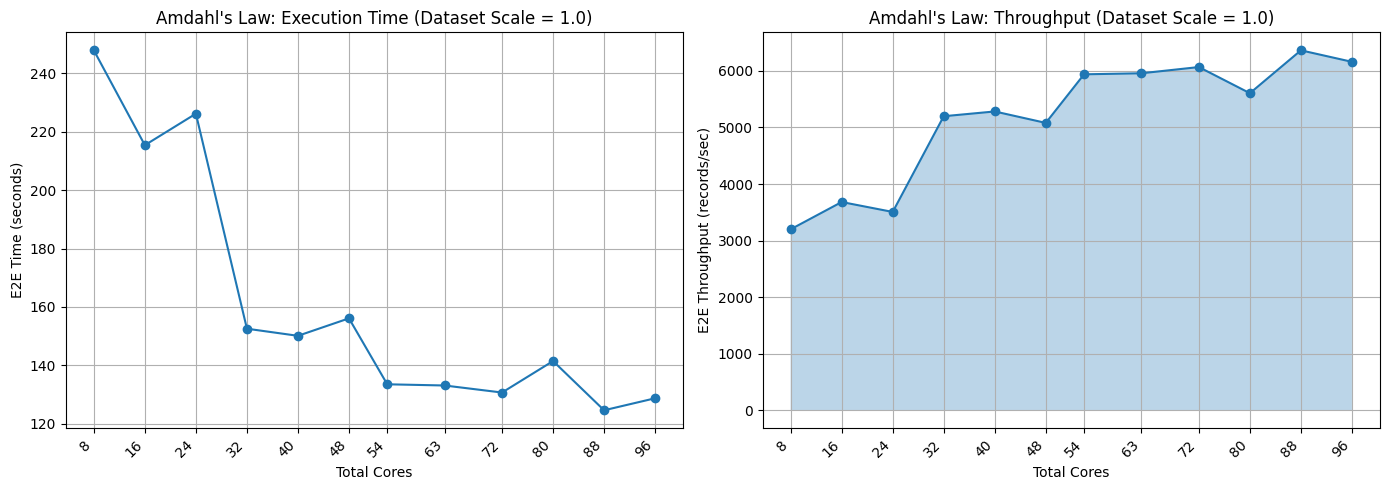


Speedup Analysis (relative to 1W-8C):
------------------------------------------------------------
1W-8C      | Time:  247.9s | Speedup: 1.00x
1W-16C     | Time:  215.4s | Speedup: 1.15x
1W-24C     | Time:  226.2s | Speedup: 1.10x
2W-16C     | Time:  152.6s | Speedup: 1.62x
2W-20C     | Time:  150.1s | Speedup: 1.65x
2W-24C     | Time:  156.1s | Speedup: 1.59x
3W-18C     | Time:  133.5s | Speedup: 1.86x
3W-21C     | Time:  133.1s | Speedup: 1.86x
3W-24C     | Time:  130.7s | Speedup: 1.90x
4W-20C     | Time:  141.5s | Speedup: 1.75x
4W-22C     | Time:  124.6s | Speedup: 1.99x
4W-24C     | Time:  128.7s | Speedup: 1.93x


In [31]:
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Line chart - E2E Time vs Total Cores
ax1.plot(df_ss['total_cores'], df_ss['E2E_time'], marker='o')
ax1.set_xticks(df_ss['total_cores'])
ax1.set_xticklabels(df_ss['total_cores'], rotation=45, ha='right')
ax1.set_xlabel('Total Cores')
ax1.set_ylabel('E2E Time (seconds)')
ax1.set_title('Amdahl\'s Law: Execution Time (Dataset Scale = 1.0)')
ax1.grid(True)

# Chart 2: Line chart with filled area - E2E Throughput vs Total Cores
ax2.plot(df_ss['total_cores'], df_ss['E2E_throughput'], marker='o')
ax2.fill_between(df_ss['total_cores'], df_ss['E2E_throughput'], alpha=0.3)
ax2.set_xticks(df_ss['total_cores'])
ax2.set_xticklabels(df_ss['total_cores'], rotation=45, ha='right')
ax2.set_xlabel('Total Cores')
ax2.set_ylabel('E2E Throughput (records/sec)')
ax2.set_title('Amdahl\'s Law: Throughput (Dataset Scale = 1.0)')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print speedup analysis
base_time = df_ss.iloc[0]['E2E_time']
print(f"\nSpeedup Analysis (relative to {df_ss.iloc[0]['config_name']}):")
print("-" * 60)
for _, row in df_ss.iterrows():
    speedup = base_time / row['E2E_time']
    print(f"{row['config_name']:10s} | Time: {row['E2E_time']:6.1f}s | Speedup: {speedup:.2f}x")

## 4. Weak Scaling Analysis - Gustafson's Law

Analyzing how the system handles increasing problem sizes proportionally with computing resources. In weak scaling, both dataset scale and core count increase together.

In [35]:
# Prepare data for weak scaling analysis
df_ws = df_weak_scaling.copy()

# Create config_name for better readability
df_ws['config_name'] = (
    df_ws['num_workers'].astype(str) + 'W-' +
    df_ws['cores_per_worker'].astype(str) + 'C'
)

# Sort by total cores (workers * cores_per_worker)
df_ws['total_cores'] = df_ws['num_workers'] * df_ws['cores_per_worker']
df_ws = df_ws.sort_values('total_cores')

print("Weak Scaling Configurations:")
print(df_ws[['config_name', 'num_workers', 'cores_per_worker', 'total_cores', 'dataset_scale', 'E2E_time', 'E2E_throughput']])

Weak Scaling Configurations:
   config_name  num_workers  cores_per_worker  total_cores  dataset_scale  \
6        1W-8C            1                 8            8          0.083   
0       1W-16C            1                16           16          0.167   
10      1W-24C            1                24           24          0.250   
3       2W-16C            2                16           32          0.333   
9       2W-20C            2                20           40          0.417   
1       2W-24C            2                24           48          0.500   
5       3W-18C            3                18           54          0.583   
2       3W-21C            3                21           63          0.667   
8       3W-24C            3                24           72          0.750   
11      4W-20C            4                20           80          0.833   
4       4W-22C            4                22           88          0.917   
7       4W-24C            4                24  

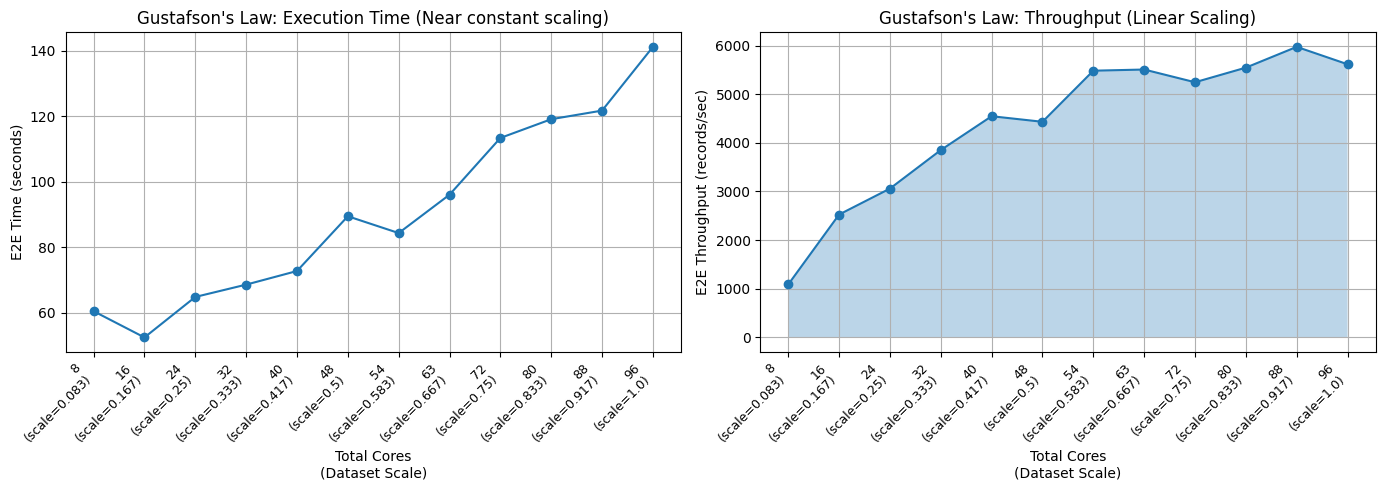


Weak Scaling Efficiency Analysis (relative to 1W-8C):
--------------------------------------------------------------------------------
1W-8C      | Cores:   8 | Scale:  0.1 | Time:   60.4s | Efficiency: 1.00
1W-16C     | Cores:  16 | Scale:  0.2 | Time:   52.4s | Efficiency: 1.15
1W-24C     | Cores:  24 | Scale:  0.2 | Time:   64.8s | Efficiency: 0.93
2W-16C     | Cores:  32 | Scale:  0.3 | Time:   68.6s | Efficiency: 0.88
2W-20C     | Cores:  40 | Scale:  0.4 | Time:   72.7s | Efficiency: 0.83
2W-24C     | Cores:  48 | Scale:  0.5 | Time:   89.5s | Efficiency: 0.68
3W-18C     | Cores:  54 | Scale:  0.6 | Time:   84.3s | Efficiency: 0.72
3W-21C     | Cores:  63 | Scale:  0.7 | Time:   96.1s | Efficiency: 0.63
3W-24C     | Cores:  72 | Scale:  0.8 | Time:  113.4s | Efficiency: 0.53
4W-20C     | Cores:  80 | Scale:  0.8 | Time:  119.1s | Efficiency: 0.51
4W-22C     | Cores:  88 | Scale:  0.9 | Time:  121.8s | Efficiency: 0.50
4W-24C     | Cores:  96 | Scale:  1.0 | Time:  141.2s | Effic

In [36]:
# Create X-axis label combining total cores and dataset scale
df_ws['x_label'] = df_ws['total_cores'].astype(str) + '\n(scale=' + df_ws['dataset_scale'].astype(str) + ')'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Line chart - E2E Time vs Total Cores (with dataset scale)
x_positions = range(len(df_ws))
ax1.plot(x_positions, df_ws['E2E_time'], marker='o')
ax1.set_xticks(x_positions)
ax1.set_xticklabels(df_ws['x_label'], rotation=45, ha='right', fontsize=9)
ax1.set_xlabel('Total Cores\n(Dataset Scale)')
ax1.set_ylabel('E2E Time (seconds)')
ax1.set_title('Gustafson\'s Law: Execution Time (Near constant scaling)')
ax1.grid(True)

# Chart 2: Line chart with filled area - E2E Throughput vs Total Cores (with dataset scale)
ax2.plot(x_positions, df_ws['E2E_throughput'], marker='o')
ax2.fill_between(x_positions, df_ws['E2E_throughput'], alpha=0.3)
ax2.set_xticks(x_positions)
ax2.set_xticklabels(df_ws['x_label'], rotation=45, ha='right', fontsize=9)
ax2.set_xlabel('Total Cores\n(Dataset Scale)')
ax2.set_ylabel('E2E Throughput (records/sec)')
ax2.set_title('Gustafson\'s Law: Throughput (Linear Scaling)')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print efficiency analysis
base_time = df_ws.iloc[0]['E2E_time']
print(f"\nWeak Scaling Efficiency Analysis (relative to {df_ws.iloc[0]['config_name']}):")
print("-" * 80)
for _, row in df_ws.iterrows():
    efficiency = base_time / row['E2E_time']
    print(f"{row['config_name']:10s} | Cores: {row['total_cores']:3d} | Scale: {row['dataset_scale']:4.1f} | Time: {row['E2E_time']:6.1f}s | Efficiency: {efficiency:.2f}")

### Stage Throughput Comparison: Strong vs Weak Scaling

Comparing average stage throughput between strong scaling (fixed dataset) and weak scaling (proportional dataset growth).

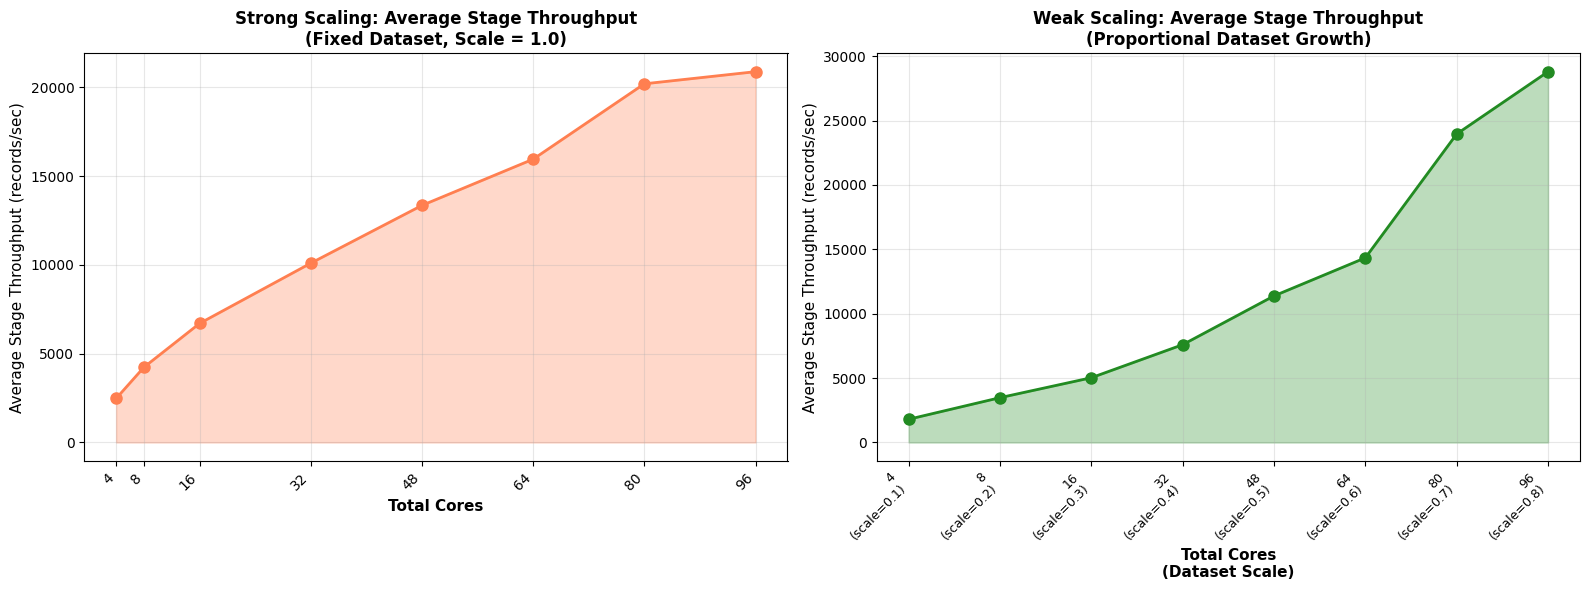


Stage Throughput Comparative Analysis:

Strong Scaling (Fixed Dataset):
------------------------------------------------------------------------------------------
1W-4C      | Cores:   4 | Avg Stage Throughput:   2475.7 records/sec
2W-4C      | Cores:   8 | Avg Stage Throughput:   4235.1 records/sec
4W-4C      | Cores:  16 | Avg Stage Throughput:   6700.4 records/sec
8W-4C      | Cores:  32 | Avg Stage Throughput:  10094.0 records/sec
12W-4C     | Cores:  48 | Avg Stage Throughput:  13347.9 records/sec
16W-4C     | Cores:  64 | Avg Stage Throughput:  15950.8 records/sec
20W-4C     | Cores:  80 | Avg Stage Throughput:  20195.5 records/sec
24W-4C     | Cores:  96 | Avg Stage Throughput:  20878.9 records/sec

Weak Scaling (Proportional Dataset):
------------------------------------------------------------------------------------------
1W-4C      | Cores:   4 | Scale:  0.1 | Avg Stage Throughput:   1800.1 records/sec
2W-4C      | Cores:   8 | Scale:  0.2 | Avg Stage Throughput:   3477.8 r

In [12]:
# Combined visualization: Average Stage Throughput for Strong and Weak Scaling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Strong Scaling - Average Stage Throughput
ax1.plot(df_ss['total_cores'], df_ss['average_stage_throughput'], marker='o', linewidth=2, markersize=8, color='coral')
ax1.fill_between(df_ss['total_cores'], df_ss['average_stage_throughput'], alpha=0.3, color='coral')
ax1.set_xticks(df_ss['total_cores'])
ax1.set_xticklabels(df_ss['total_cores'], rotation=45, ha='right')
ax1.set_xlabel('Total Cores', fontsize=11, fontweight='bold')
ax1.set_ylabel('Average Stage Throughput (records/sec)', fontsize=11)
ax1.set_title('Strong Scaling: Average Stage Throughput\n(Fixed Dataset, Scale = 1.0)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Chart 2: Weak Scaling - Average Stage Throughput
x_positions_ws = range(len(df_ws))
ax2.plot(x_positions_ws, df_ws['average_stage_throughput'], marker='o', linewidth=2, markersize=8, color='forestgreen')
ax2.fill_between(x_positions_ws, df_ws['average_stage_throughput'], alpha=0.3, color='forestgreen')
ax2.set_xticks(x_positions_ws)
ax2.set_xticklabels(df_ws['x_label'], rotation=45, ha='right', fontsize=9)
ax2.set_xlabel('Total Cores\n(Dataset Scale)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Average Stage Throughput (records/sec)', fontsize=11)
ax2.set_title('Weak Scaling: Average Stage Throughput\n(Proportional Dataset Growth)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comparative analysis
print("\nStage Throughput Comparative Analysis:")
print("=" * 90)
print("\nStrong Scaling (Fixed Dataset):")
print("-" * 90)
for _, row in df_ss.iterrows():
    print(f"{row['config_name']:10s} | Cores: {row['total_cores']:3d} | Avg Stage Throughput: {row['average_stage_throughput']:8.1f} records/sec")

print("\nWeak Scaling (Proportional Dataset):")
print("-" * 90)
for _, row in df_ws.iterrows():
    print(f"{row['config_name']:10s} | Cores: {row['total_cores']:3d} | Scale: {row['dataset_scale']:4.1f} | Avg Stage Throughput: {row['average_stage_throughput']:8.1f} records/sec")

## 5. Worker Sweep Analysis

Analyzing the impact of different worker configurations while maintaining constant total compute resources (96 cores). This explores the trade-off between parallelism (number of workers) and per-worker resources (cores per worker).

In [14]:
# Prepare data for worker sweep analysis
df_worker = df_worker_sweep.copy()

# Create config_name for better readability
df_worker['config_name'] = (
    df_worker['num_workers'].astype(str) + 'W-' +
    df_worker['cores_per_worker'].astype(str) + 'C'
)

# Calculate total cores
df_worker['total_cores'] = df_worker['num_workers'] * df_worker['cores_per_worker']

# Sort by num_workers
df_worker = df_worker.sort_values('num_workers')

print("Worker Sweep Configurations:")
print(df_worker[['config_name', 'num_workers', 'cores_per_worker', 'total_cores', 'E2E_time', 'E2E_throughput', "num_tasks"]])

Worker Sweep Configurations:
  config_name  num_workers  cores_per_worker  total_cores    E2E_time  \
6      1W-96C            1                96           96  452.520520   
4      2W-48C            2                48           96  268.533456   
5      4W-24C            4                24           96  197.907585   
2      8W-12C            8                12           96  227.262228   
1      12W-8C           12                 8           96  220.884060   
0      16W-6C           16                 6           96  178.604334   
3      24W-4C           24                 4           96  224.962882   

   E2E_throughput  num_tasks  
6     2920.718382        315  
4     4921.863436        315  
5     6678.293798        315  
2     5815.682653        315  
1     5983.614205        315  
0     7400.072401        315  
3     5875.124780        240  


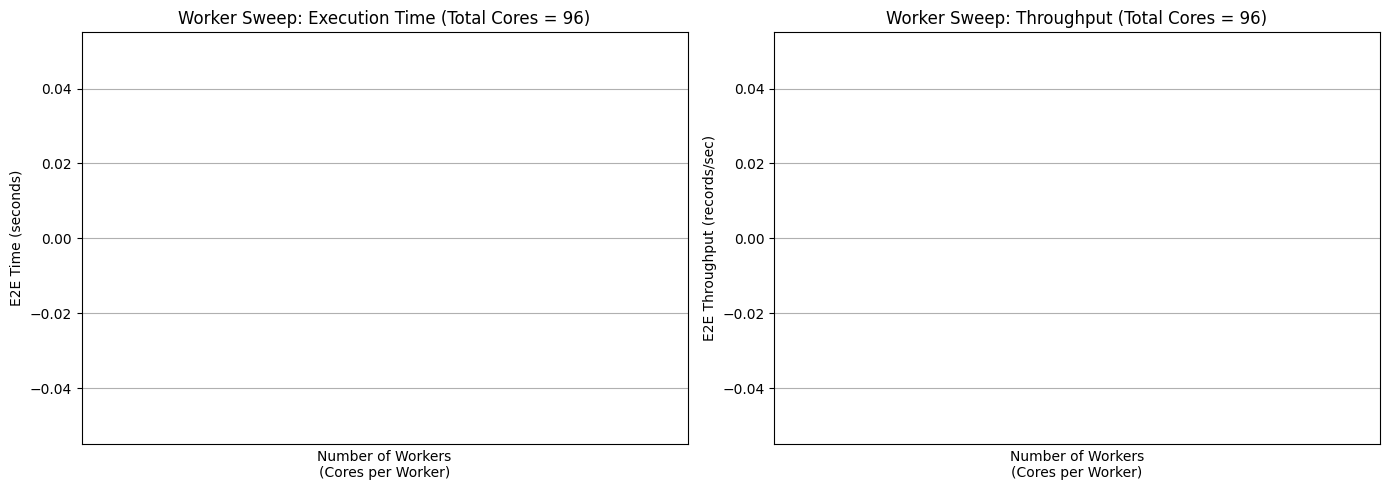


Worker Configuration Analysis (Total Cores = 96):
--------------------------------------------------------------------------------


In [15]:
# Filter for configurations with 96 total cores
df_worker_96 = df_worker[df_worker['total_cores'] == 48].copy()

# Create X-axis label with num_workers and cores_per_worker
df_worker_96['x_label'] = df_worker_96['num_workers'].astype(str) + '\n(' + df_worker_96['cores_per_worker'].astype(str) + ')'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Line chart - E2E Time vs num_workers
x_positions = range(len(df_worker_96))
ax1.plot(x_positions, df_worker_96['E2E_time'], marker='o')
ax1.set_xticks(x_positions)
ax1.set_xticklabels(df_worker_96['x_label'], rotation=45, ha='right', fontsize=9)
ax1.set_xlabel('Number of Workers\n(Cores per Worker)')
ax1.set_ylabel('E2E Time (seconds)')
ax1.set_title('Worker Sweep: Execution Time (Total Cores = 96)')
ax1.grid(True)

# Chart 2: Line chart with filled area - E2E Throughput vs num_workers
ax2.plot(x_positions, df_worker_96['E2E_throughput'], marker='o')
ax2.fill_between(x_positions, df_worker_96['E2E_throughput'], alpha=0.3)
ax2.set_xticks(x_positions)
ax2.set_xticklabels(df_worker_96['x_label'], rotation=45, ha='right', fontsize=9)
ax2.set_xlabel('Number of Workers\n(Cores per Worker)')
ax2.set_ylabel('E2E Throughput (records/sec)')
ax2.set_title('Worker Sweep: Throughput (Total Cores = 96)')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print configuration analysis
print(f"\nWorker Configuration Analysis (Total Cores = 96):")
print("-" * 80)
for _, row in df_worker_96.iterrows():
    print(f"{row['config_name']:10s} | Workers: {row['num_workers']:3d} | Cores/Worker: {row['cores_per_worker']:3d} | Time: {row['E2E_time']:6.1f}s | Throughput: {row['E2E_throughput']:8.1f}")

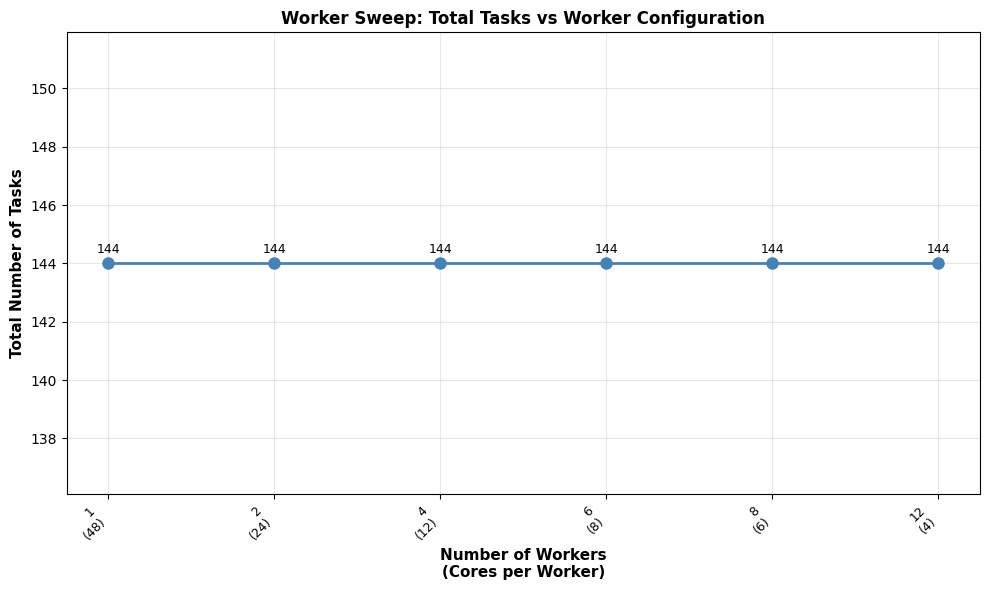


Task Analysis (Total Cores = 96):
--------------------------------------------------------------------------------
1W-48C     | Workers:   1 | Cores/Worker:  48 | Total Tasks:   144
2W-24C     | Workers:   2 | Cores/Worker:  24 | Total Tasks:   144
4W-12C     | Workers:   4 | Cores/Worker:  12 | Total Tasks:   144
6W-8C      | Workers:   6 | Cores/Worker:   8 | Total Tasks:   144
8W-6C      | Workers:   8 | Cores/Worker:   6 | Total Tasks:   144
12W-4C     | Workers:  12 | Cores/Worker:   4 | Total Tasks:   144


In [15]:
# Plot num_tasks vs number of workers
fig, ax = plt.subplots(figsize=(10, 6))

# Create X-axis label with num_workers and cores_per_worker
df_worker_96['x_label'] = df_worker_96['num_workers'].astype(str) + '\n(' + df_worker_96['cores_per_worker'].astype(str) + ')'

# Line chart - num_tasks vs num_workers
x_positions = range(len(df_worker_96))
ax.plot(x_positions, df_worker_96['num_tasks'], marker='o', linewidth=2, markersize=8, color='steelblue')
ax.set_xticks(x_positions)
ax.set_xticklabels(df_worker_96['x_label'], rotation=45, ha='right', fontsize=9)
ax.set_xlabel('Number of Workers\n(Cores per Worker)', fontsize=11, fontweight='bold')
ax.set_ylabel('Total Number of Tasks', fontsize=11, fontweight='bold')
ax.set_title('Worker Sweep: Total Tasks vs Worker Configuration', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Annotate each point with the exact value
for i, (x_pos, row) in enumerate(zip(x_positions, df_worker_96.itertuples())):
    ax.annotate(f"{int(row.num_tasks)}", 
                (x_pos, row.num_tasks),
                fontsize=9, ha='center', va='bottom', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Print task analysis
print(f"\nTask Analysis (Total Cores = 96):")
print("-" * 80)
for _, row in df_worker_96.iterrows():
    print(f"{row['config_name']:10s} | Workers: {row['num_workers']:3d} | Cores/Worker: {row['cores_per_worker']:3d} | Total Tasks: {int(row['num_tasks']):5d}")